# ASSISTments2015 Data Analysis

## Data Description

### Column Description


| Field    | Annotation                                          |
| -------- | --------------------------------------------------- |
| user id | Id of the student |
| log id | Unique ID of the logged actions | 
| sequence id | Id of the problem set |
| correct | Correct on the fisrt attempt or Incorrect on the first attempt, or asked for help |




In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [2]:
path = "2015_100_skill_builders_main_problems.csv"
data = pd.read_csv(path, encoding = "ISO-8859-15",low_memory=False) 

## Record Examples

In [3]:
pd.set_option('display.max_columns', 500)
data.head() 

,user_id,log_id,sequence_id,correct
0,50121,167478035,7014,0.0
1,50121,167478043,7014,1.0
2,50121,167478053,7014,1.0
3,50121,167478069,7014,1.0
4,50964,167478041,7014,1.0


----
## General features

In [4]:
data.describe()

,user_id,log_id,sequence_id,correct
count,708631.000000,7.086310e+05,708631.000000,708631.000000
mean,296232.978276,1.695323e+08,22683.474821,0.725502
std,48018.650247,3.608096e+06,41593.028018,0.437467
min,50121.000000,1.509145e+08,5898.000000,0.000000
25%,279113.000000,1.660355e+08,7020.000000,0.000000
50%,299168.000000,1.704579e+08,9424.000000,1.000000
75%,335647.000000,1.723789e+08,14442.000000,1.000000
max,362374.000000,1.754827e+08,236309.000000,1.000000


In [5]:
print("The number of records: "+ str(len(data['log_id'].unique())))

The number of records: 708631


In [6]:
print('Part of missing values for every column')
print(data.isnull().sum() / len(data))

Part of missing values for every column
user_id        0.0
log_id         0.0
sequence_id    0.0
correct        0.0
dtype: float64


In [7]:
len(data.user_id.unique())

19917

In [8]:
len(data.sequence_id.unique())

100

## Sort by user id

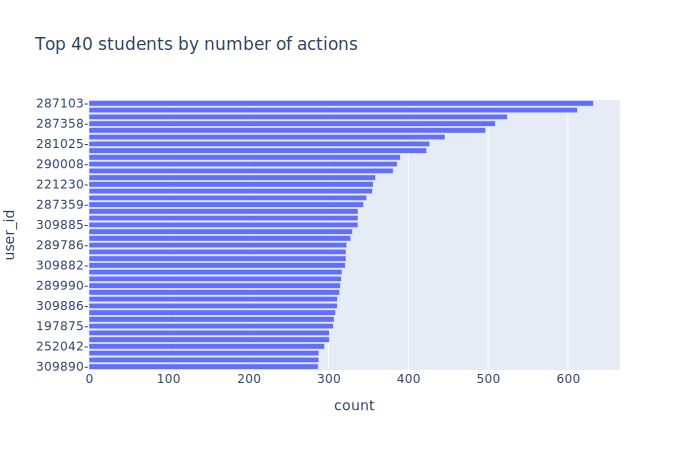

In [9]:
ds = data['user_id'].value_counts().reset_index()

ds.columns = [
    'user_id',
    'count'
]

ds['user_id'] = ds['user_id'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'user_id',
    orientation='h',
    title='Top 40 students by number of actions'
)

fig.show("svg")

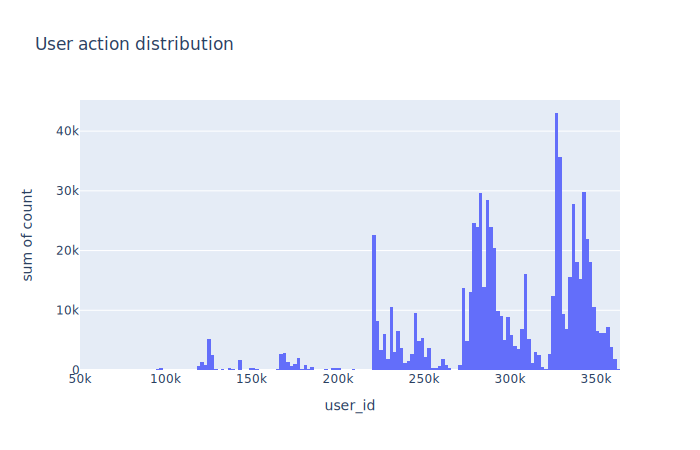

In [10]:
ds = data['user_id'].value_counts().reset_index()

ds.columns = [
    'user_id',
    'count'
]

ds = ds.sort_values('user_id')

fig = px.histogram(
    ds,
    x = 'user_id',
    y = 'count',
    title = 'User action distribution'
)

fig.show("svg")

## Correct answers

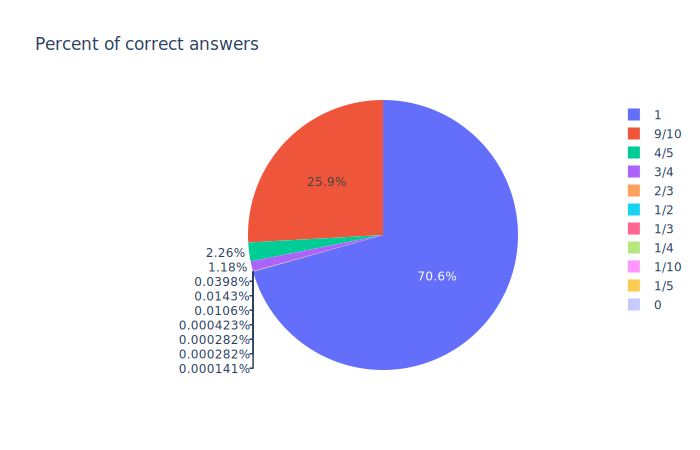

In [11]:
ds = data['correct'].value_counts().reset_index()

ds.columns = [
    'correct',
    'percent'
]

ds['percent'] /= len(data)
ds = ds.sort_values(['percent'])

fig = px.pie(
    ds,
    names = ['0', '1/10','1/5', '1/4','1/3', '1/2','2/3', '3/4','4/5','9/10', '1'],
    values = 'percent',
    title = 'Percent of correct answers'    
)

fig.show("svg")

Minor note: we also have Essay questions that teachers can grade. If this value is say .25 that means the teacher gave it a 1 our of 4. 

## Sort by sequence id

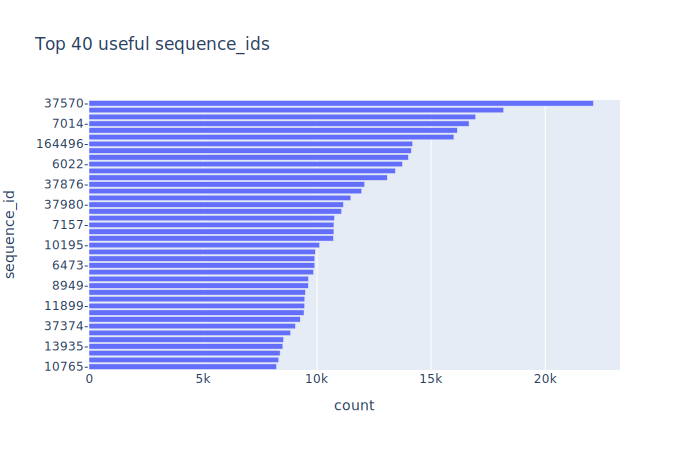

In [12]:
ds = data['sequence_id'].value_counts().reset_index() 

ds.columns = [
    'sequence_id',
    'count'
]

ds['sequence_id'] = ds['sequence_id'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'sequence_id',
    orientation = 'h',
    title = 'Top 40 useful sequence_ids'
)

fig.show("svg")

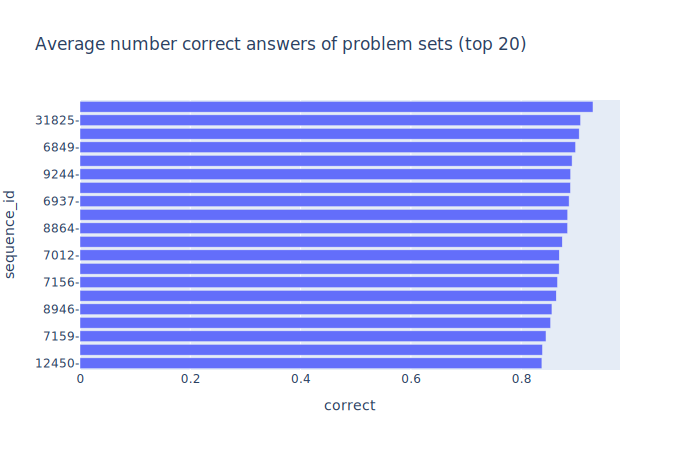

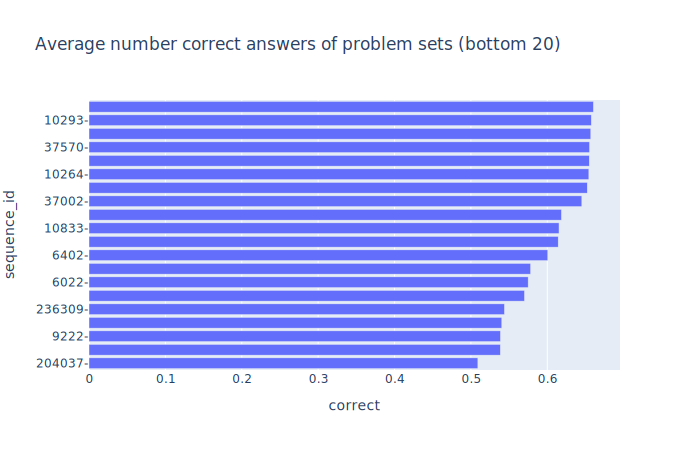

In [13]:
ds = data.groupby('sequence_id')['correct'].mean() 
ds = ds.reset_index()

ds['sequence_id'] = ds['sequence_id'].astype(str) + '-'
ds1 = ds.sort_values(['correct']).tail(20)

fig1 = px.bar(
    ds1,
    x = 'correct',
    y = 'sequence_id',
    orientation = 'h',
    title = 'Average number correct answers of problem sets (top 20)'
)

fig1.show("svg")

ds2 = ds.sort_values(['correct']).head(20)

fig2 = px.bar(
    ds2,
    x = 'correct',
    y = 'sequence_id',
    orientation = 'h',
    title = 'Average number correct answers of problem sets (bottom 20)'
)
fig2.show("svg")

This figure presents the average number correct answers of problem sets. These low-average problem sets deserve more attention from teachers and students.